In [1]:
# import tools (pandas ect)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read in files
storm_df = pd.read_csv("Resources/storms.csv")
#storm_df.tail()

In [3]:
zillow_df = pd.read_csv('Resources/ZHVI.csv')
#zillow_df.tail()

In [4]:
zillow_df.reset_index(inplace=True)

In [5]:
# Rename Date column and set it as index
zillow_df = zillow_df.rename(columns={'Unnamed: 0':'Date'})
zillow_df.set_index('Date', inplace=True)
#zillow_df

In [6]:
# Extract florida data and save as seperate dataframe
florida_zillow = zillow_df[['Florida']]
#florida_zillow

In [7]:
florida_2019_df = pd.read_csv('Resources/Florida_2019_all_counties.csv')
florida_2020_df = pd.read_csv('Resources/Florida_2020_all_counties.csv')

#florida_2019_df

In [8]:
flood_df = pd.read_csv('Resources/nfip-flood-policies.csv')
#flood_df.head()

C:\Users\antoi\AppData\Local\Temp\ipykernel_28800\3959475226.py:1: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  flood_df = pd.read_csv('Resources/nfip-flood-policies.csv')


<Axes: xlabel='Date'>

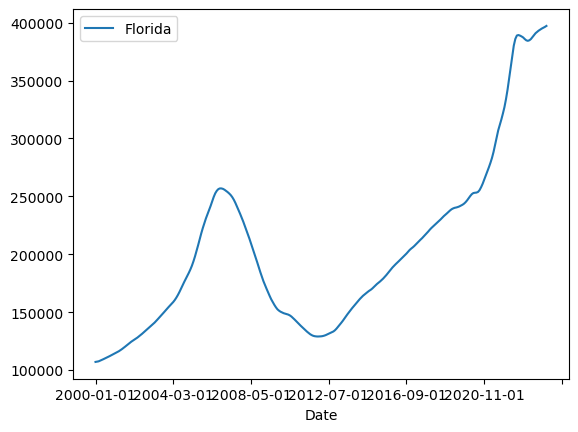

In [9]:
florida_zillow.plot()

In [10]:
storm_df['status'].unique()

array(['tropical depression', 'tropical storm', 'extratropical',
       'hurricane', 'subtropical storm', 'subtropical depression',
       'disturbance', 'other low', 'tropical wave'], dtype=object)

In [11]:
#Extract only hurricane data from the storm dataframe
hurricane = storm_df.loc[storm_df['status'] == 'hurricane']
hurricane.set_index('year', inplace = True)

In [12]:
#Extract years of interest and save as sepearte dataframe
hurricane_2017_2021 = hurricane.loc[[2017, 2018 , 2019, 2020, 2021]]
hurricane_2017_2021.head()

,Unnamed: 0,name,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
year,,,,,,,,,,,,,
2017,16027,Franklin,8,9,18,20.2,-94.4,hurricane,1.0,65,984,210.0,30.0
2017,16028,Franklin,8,10,0,20.3,-95.5,hurricane,1.0,75,981,220.0,30.0
2017,16029,Franklin,8,10,5,20.0,-96.6,hurricane,1.0,70,990,220.0,30.0
2017,16045,Gert,8,15,6,31.5,-72.3,hurricane,1.0,65,986,140.0,20.0
2017,16046,Gert,8,15,12,32.3,-72.1,hurricane,1.0,70,982,150.0,20.0


In [13]:
#Drop unneeded columns
hurricane_2017_2021.drop(columns=['Unnamed: 0','status'], inplace=True)
hurricane_2017_2021

,name,month,day,hour,lat,long,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
year,,,,,,,,,,,
2017,Franklin,8,9,18,20.2,-94.4,1.0,65,984,210.0,30.0
2017,Franklin,8,10,0,20.3,-95.5,1.0,75,981,220.0,30.0
2017,Franklin,8,10,5,20.0,-96.6,1.0,70,990,220.0,30.0
2017,Gert,8,15,6,31.5,-72.3,1.0,65,986,140.0,20.0
2017,Gert,8,15,12,32.3,-72.1,1.0,70,982,150.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
2021,Sam,10,4,0,38.7,-52.2,2.0,90,957,420.0,100.0
2021,Sam,10,4,6,39.9,-49.9,2.0,90,957,440.0,60.0
2021,Sam,10,4,12,41.4,-47.1,2.0,85,960,440.0,60.0


In [14]:
hurricane_2017_2021 = hurricane_2017_2021.reset_index()


In [15]:
hurricane_2017_2021.groupby(by = ['year','month'])[['name']].nunique('name')

name
year month      
2017 8         4
     9         5
     10        2
2018 7         2
     9         3
     10        3
2019 7         1
     8         1
     9         4
     10        2
2020 7         2
     8         3
     9         4
     10        4
     11        2
2021 7         1
     8         3
     9         3
     10        1

In [17]:
hurricane_2017_2021['date'] = pd.to_datetime(
hurricane_2017_2021

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None